In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Spam.tsv",sep = "\t")

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [7]:
df.count()

label      5572
message    5572
length     5572
punct      5572
dtype: int64

In [8]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

So clearly we can see we have imbalance datasets. So we need to balance it

In [9]:
ham = df[df["label"] == "ham"]

In [10]:
spam =  df[df["label"] == "spam"]

In [11]:
ham.shape

(4825, 4)

In [12]:
spam.shape

(747, 4)

In [13]:
hamf = ham.sample(spam.shape[0]) # undersampling ham

In [14]:
hamf.shape

(747, 4)

In [15]:
hamf.head()

,label,message,length,punct
338,ham,Just sleeping..and surfing,26,2
1808,ham,Do have a nice day today. I love you so dearly.,47,2
3871,ham,Oh ok wait 4 me there... My lect havent finish,46,3
1278,ham,Dont put your phone on silent mode ok,37,0
481,ham,"Almost there, see u in a sec",28,1


In [16]:
data = pd.concat([hamf, spam], ignore_index=True)

In [17]:
data.head()

,label,message,length,punct
0,ham,Just sleeping..and surfing,26,2
1,ham,Do have a nice day today. I love you so dearly.,47,2
2,ham,Oh ok wait 4 me there... My lect havent finish,46,3
3,ham,Dont put your phone on silent mode ok,37,0
4,ham,"Almost there, see u in a sec",28,1


In [18]:
data.shape

(1494, 4)

In [19]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='length', ylabel='Count'>

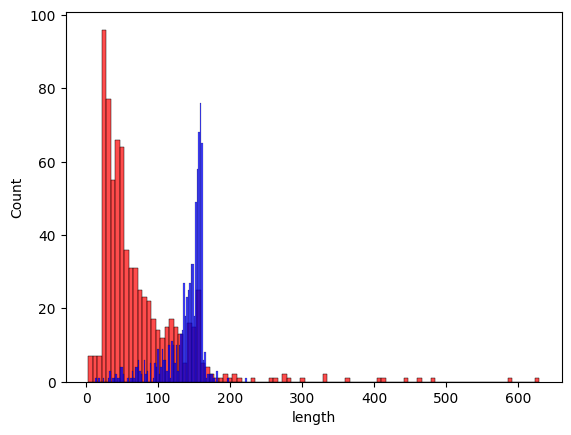

In [21]:
sns.histplot(data=hamf,x = 'length',bins = 100, color ="red",alpha = 0.7)
sns.histplot(data=spam,x = 'length',bins = 100, color ="blue")

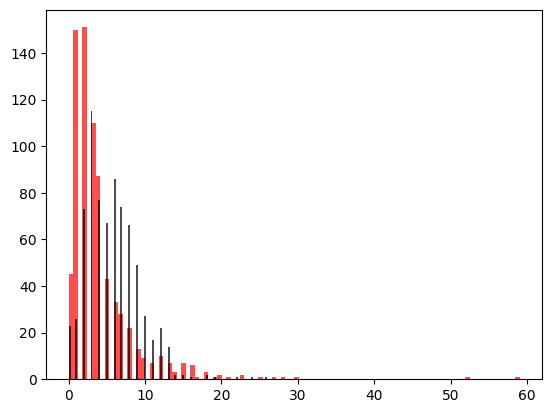

In [22]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7, color='red')
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7, color='black')
plt.show()

In [23]:
data.head(1)

,label,message,length,punct
0,ham,Just sleeping..and surfing,26,2


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(data["message"],data["label"],test_size = 0.3,random_state =101)

## text to vector form

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ml algorithm
from sklearn.ensemble import RandomForestClassifier

# pipeline package to merge NLP and Machine Learning together and get the output

from sklearn.pipeline import Pipeline

## RF

In [27]:
classifier = Pipeline([("TF-IDF",TfidfVectorizer()),("Classifier",RandomForestClassifier())])

In [28]:
classifier.fit(xtrain,ytrain)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [29]:
# predict the model by using train and test data
y_pred_train = classifier.predict(xtrain)

y_pred_test = classifier.predict(xtest)

In [30]:
# Evaluation matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(ytrain, y_pred_train))
print("*******************"*10)
print(confusion_matrix(ytest, y_pred_test))

[[521   0]
 [  0 524]]
**********************************************************************************************************************************************************************************************
[[226   0]
 [ 20 203]]


In [31]:
print(classification_report(ytrain, y_pred_train))
print("*******************"*10)
print(classification_report(ytest, y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       521
        spam       1.00      1.00      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

**********************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       226
        spam       1.00      0.91      0.95       223

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [33]:
print(accuracy_score(ytrain, y_pred_train))
print("*******************"*10)
print(accuracy_score(ytest, y_pred_test))

1.0
**********************************************************************************************************************************************************************************************
0.955456570155902


# SVM

In [35]:
from sklearn.svm import SVC

classifier1 = Pipeline([('TF-IDF', TfidfVectorizer()), 
                      ('Classifier', SVC())])

In [36]:
classifier1.fit(xtrain, ytrain)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()), ('Classifier', SVC())])

In [37]:
# predict the model by using train and test data
y_pred_train1 = classifier1.predict(xtrain)

y_pred_test1 = classifier1.predict(xtest)

In [39]:
print(accuracy_score(ytrain, y_pred_train1))
print("*******************"*10)
print(accuracy_score(ytest, y_pred_test1))

0.999043062200957
**********************************************************************************************************************************************************************************************
0.9599109131403119


# XGBoost Classifierm
xboost is parallel method and rf is sequential . In industry we use xgboost also so they are like cut to cut model. xgboost handle high bias and good for accuracy

In [43]:
#!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.5 MB/s eta 0:00:00:00:010:01


In [40]:
data.head(2)

,label,message,length,punct
0,ham,Just sleeping..and surfing,26,2
1,ham,Do have a nice day today. I love you so dearly.,47,2


In [42]:
import numpy as np

In [47]:
data['label'] = np.where(data['label']=='ham',0,1)

In [52]:
data.head()

,label,message,length,punct
0,0,Just sleeping..and surfing,26,2
1,0,Do have a nice day today. I love you so dearly.,47,2
2,0,Oh ok wait 4 me there... My lect havent finish,46,3
3,0,Dont put your phone on silent mode ok,37,0
4,0,"Almost there, see u in a sec",28,1


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.3, random_state=101)

In [54]:
from xgboost import XGBClassifier

In [55]:
classifier2 = Pipeline([('TF-IDF', TfidfVectorizer()), 
                      ('Classifier', XGBClassifier())])

In [57]:
classifier2.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [58]:
# predict the model by using train and test data
y_pred_train2 = classifier2.predict(x_train)

y_pred_test2 = classifier2.predict(x_test)

In [61]:
print(accuracy_score(y_train, y_pred_train2))
print("*******************"*10)
print(accuracy_score(y_test, y_pred_test2))

0.9971291866028709
**********************************************************************************************************************************************************************************************
0.9153674832962138


# RandomForest is the best model
# without balancing the data,we wanted to explore

In [62]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [63]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'],
                                                   test_size=0.3, random_state=101)

In [65]:
classifier_without_balance = Pipeline([('TF-IDF', TfidfVectorizer()), 
                      ('Classifier', RandomForestClassifier())])

In [66]:
classifier_without_balance.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [67]:
# predict the model by using train and test data
y_pred_train3 = classifier_without_balance.predict(x_train)

y_pred_test3 = classifier_without_balance.predict(x_test)

In [68]:
print(accuracy_score(y_train, y_pred_train3))
print("*******************"*10)
print(accuracy_score(y_test, y_pred_test3))

1.0
**********************************************************************************************************************************************************************************************
0.9784688995215312


In [69]:
print(classification_report(y_train, y_pred_train3))
print("*******************"*10)
print(classification_report(y_test, y_pred_test3))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3350
        spam       1.00      1.00      1.00       550

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900

**********************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1475
        spam       1.00      0.82      0.90       197

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672



# Lets save models

In [71]:
import joblib

# Save the model to a file
joblib.dump(classifier_without_balance, 'classifier_without_balance.pkl')


['classifier_without_balance.pkl']

In [72]:
conda env list

# conda environments:
#
base                     /opt/anaconda3
animeR                   /opt/anaconda3/envs/animeR
animeRecommendation      /opt/anaconda3/envs/animeRecommendation
chicken                  /opt/anaconda3/envs/chicken
hw                       /opt/anaconda3/envs/hw
hw1                      /opt/anaconda3/envs/hw1
hw1new                   /opt/anaconda3/envs/hw1new
ml                    *  /opt/anaconda3/envs/ml
model2                   /opt/anaconda3/envs/model2
pysparkenv               /opt/anaconda3/envs/pysparkenv
test                     /opt/anaconda3/envs/test


Note: you may need to restart the kernel to use updated packages.


In [73]:
#rough works

In [74]:
df1 = pd.read_csv("ans.csv")

In [80]:
df1.head()

,Unnamed: 0,Message,Prediction
0,0,"Go until jurong point, crazy.. Available only ...",ham
1,1,Ok lar... Joking wif u oni...,ham
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,3,U dun say so early hor... U c already then say...,ham
4,4,"Nah I don't think he goes to usf, he lives aro...",ham


In [82]:
df1.shape

(5572, 3)

In [83]:
df.shape

(5572, 4)

In [87]:
df["label"].dtype

dtype('O')

In [89]:
df1["Prediction"].dtype

dtype('O')

5572


In [97]:
count = 0
for x, y in zip(df['label'], df1['Prediction']):
    if x != y:
        count += 1
print("Errors = ", count)


Errors =  36


In [ ]:
# 36 error doable